# Let's get started

First, good habits. Running `%load_ext lab_black` makes all your code format to uncompromoisingly compliant with some such-and-such. But it's pretty and works, so I use it. Most comments from here forward are Python comments in the code-blocks.

In [ ]:
%load_ext lab_black

In [ ]:
# We don't need much right away.

from time import time
from pathlib import Path
from pickle import loads, dumps
from sqlitedict import SqliteDict as sqldict

In [ ]:
# Watch for the folder being created (if not already there).
data = "cats"
Path(data).mkdir(exist_ok=True)
print("Done")

In [ ]:
# Let's count from 0 to 9 in Python
for i in range(10):
    print(i, end=" ")
print("Done")

In [ ]:
# Let's count from 1 to 10 in Python
for i in range(1, 11):
    print(i, end=" ")
print("Done")

In [ ]:
# Don't make things more difficult
for i in range(10):
    print(i + 1, end=" ")
print("Done")

In [ ]:
# Count to 100,000 by 1,000.
for i in range(100000):
    if not i % 1000:
        print(i, end=" ")
print("Done")

In [ ]:
# How many zeros in ten-thousand? In a thousand?
for i in range(10**5):
    if not i % 10**3:
        print(i, end=" ")
print("Done")

In [ ]:
# Can you format that with commas?
for i in range(10**5):
    if not i % 10**3:
        print(f"{i:,}", end=" ")
print("Done")

In [ ]:
# What's it like to write a million lines into a text file?
filename = f"{data}/text.txt"
with open(filename, "wt") as fh:
    for i in range(1000000):
        fh.write(f"{i}\n")
print("Done")  # Fast!!!

In [ ]:
# That was fast. How big is that file?
bytesize = Path(filename).stat().st_size
kilo = 1000
print(f"The file {filename} is {bytesize:,} Bytes.")
print(f"Abbreviated to {bytesize / kilo:,.0f} Kilobytes.")  # The :,0f formats
print(f"Or just {bytesize / kilo / kilo:.0f} Megs.")
print("Done")
# A million short lines is still several megs.

In [ ]:
# What's it like to write 100,000 keys into a SQlite database?
# Let's count down instead of up. Keys go up but count is down.
filename = f"{data}/database.db"
now = time()
upto = 100000
with sqldict(filename) as db:
    for i in range(upto):
        db[i] = None
        if not i % 10000:
            db.commit()
            print(f"{upto - i:,}...", end=" ")
seconds = int(time() - now)
print(f"\nDone ({seconds} seconds)")

In [ ]:
# That was fast. How big is that file?
bytesize = Path(filename).stat().st_size
kilo = 1000
print("While you get the power of SQL ths way, you lose speed.")
print(f"The file {filename} is {bytesize / kilo:,.0f} Kilobytes")
print(f"Or ~{bytesize / kilo / kilo:.0f} Megs, but only has {upto:,} records.")
print("We will not go this route.")
print("Done")

In [ ]:
# How many zeros in a billion?
f"{10**9:,} The Goose Drank Done"

In [ ]:
# How many zeros in a hundred-million?
f"{10**8:,} Done"

In [ ]:
# Let's count down from a billion by hundred-millions
hundredmillion = 10**8
billion = 10**9
now = time()
modulorow = 1
print("Count down with me from a billion in Python:")
for i in range(billion):
    if not i % hundredmillion:
        glimpse = int(time() - now)
        print(f"{modulorow}: {billion - i:,} ({glimpse} sec)...")
        modulorow += 1
seconds = int(time() - now)
print(f"Done ({seconds} seconds)")  # Computers are fast but not that fast

In [ ]:
# Make a hundred million keys and save them to disk.
seen = set()
million = 10**6
for i in range(million):
    seen.add(i)
print(f"Made {len(seen):,} keys.")

# Dump pickled set to file
filename = f"{data}/dumps.pkl"
kilo = 1000
with open(filename, "wb") as fh:
    fh.write(dumps(seen))
print(f"Saved {filename} to drive.")

# Report size of file
bytesize = Path(filename).stat().st_size
print(f"{filename} is {bytesize / kilo:,.0f} Kilobytes")

# Load picled set out of file"
with open(filename, "rb") as fh:
    seen = loads(fh.read())
print(f"Read native Python {type(seen)} back off of drive.")
print("Go this route because of how fast and awesome this is?")
print("Done")

In [129]:
# So far I've used sequential numbers from 0 to a billion as keys.
# Let's use cats as our keys instead. Load our packges and configure.

import shutil
import pandas as pd
from PIL import Image
from httpx import get
from io import BytesIO
from time import sleep
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from pickle import loads, dumps
from imagehash import phash, whash
from IPython.display import display
from PIL.PngImagePlugin import PngInfo

# Where we save cats and generate thumbs.
data = "cats"
save_to = f"{data}/source"
thumbs = f"{data}/thumbs"
tagtable = Path(f"{data}/tagtable.pkl")
by_types = ["by_folder", "by_ham", "by_size"]

# Make those locatiosn if they don't exist.
Path(data).mkdir(exist_ok=True)
Path(save_to).mkdir(exist_ok=True)
Path(thumbs).mkdir(exist_ok=True)

In [19]:
# Download 30 cats that don't exist.

# If you actually want to fetch 30 cats that don't exist again
# then delete the contents of cats/source folder and re-run.
# You can delete just a sinlge cat from source and watch it re-fill
# except by doing so removes referenced data. Fetch more. Whatever.

url = "https://thiscatdoesnotexist.com/"
cats = 30
for i in range(cats):
    filename = f"{save_to}/cat-{str(i).zfill(3)}.jpg"
    if not Path(filename).exists():
        print(f"{cats - i} Downloading: {filename}")
        response = get(url)
        img = Image.open(BytesIO(response.content))
        img.save(filename)
        sleep(1)
print("Done")

Done


cats/source/cat-000.jpg


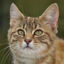

512x512_00626646727f3f3d_.png

cats/source/cat-001.jpg


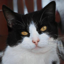

512x512_051100181e3fffff_.png

cats/source/cat-002.jpg


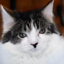

512x512_000080881fffffff_.png

cats/source/cat-003.jpg


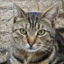

512x512_fffee1e0c8f84040_.png

cats/source/cat-004.jpg


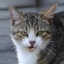

512x512_c1c2e0f0f8fc38f8_.png

cats/source/cat-005.jpg


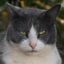

512x512_0118011898feffff_.png

cats/source/cat-006.jpg


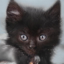

512x512_ffcd8181a581c3cb_.png

cats/source/cat-007.jpg


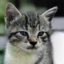

512x512_800005870be7ffff_.png

cats/source/cat-008.jpg


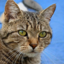

512x512_efe787c30103170f_.png

cats/source/cat-009.jpg


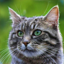

512x512_38fe7e45d190c9c1_.png

cats/source/cat-010.jpg


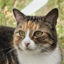

512x512_7fdcc11111303b3f_.png

cats/source/cat-011.jpg


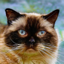

512x512_ffbca1430181c78f_.png

cats/source/cat-012.jpg


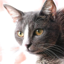

512x512_fdf8c0c0f0e0f0f8_.png

cats/source/cat-013.jpg


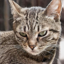

512x512_437f3e3f8b0f0901_.png

cats/source/cat-014.jpg


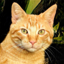

512x512_00223c7e7cfce8f8_.png

cats/source/cat-015.jpg


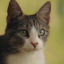

512x512_bb9383030b0f0f3f_.png

cats/source/cat-016.jpg


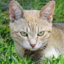

512x512_023e3c7e3f1f0703_.png

cats/source/cat-017.jpg


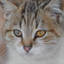

512x512_00c0c0a8d0ef7fff_.png

cats/source/cat-018.jpg


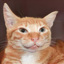

512x512_00007e7c7c7c7e7c_.png

cats/source/cat-019.jpg


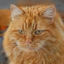

512x512_007e7975f1f07870_.png

cats/source/cat-020.jpg


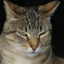

512x512_0040447cfcfcfcfc_.png

cats/source/cat-021.jpg


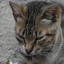

512x512_f3c0c1e3c1e1e1e3_.png

cats/source/cat-022.jpg


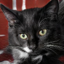

512x512_7cf0d0c4f4f0f0e8_.png

cats/source/cat-023.jpg


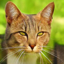

512x512_7dbd8f8f0f0c0c60_.png

cats/source/cat-024.jpg


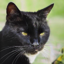

512x512_bf9b838303070f1f_.png

cats/source/cat-025.jpg


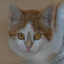

512x512_bd818111116fff9c_.png

cats/source/cat-026.jpg


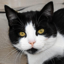

512x512_fd0080909dbfc7dc_.png

cats/source/cat-027.jpg


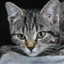

512x512_0267670e1c3c58ff_.png

cats/source/cat-028.jpg


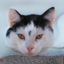

512x512_fff98191c7ef8000_.png

cats/source/cat-029.jpg


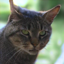

512x512_ffde81c30307070f_.png

cats/seencats.pkl is 976 Bytes
Done


In [20]:
# Generate thumbnails for the source folder of cat images.
# If you wish to see the thumbnails generate again, you have to
# delete seencats.pkl and the contents of thumbs folder.

size = 64

# Load set of seen cats from pickle if exists.
pickled_cats = f"{data}/seencats.pkl"
if Path(pickled_cats).exists():
    with open(pickled_cats, "rb") as fh:
        seen = loads(fh.read())
else:
    seen = set()

# Make thumbnails of cat pics.
for cat in Path(save_to).glob("*.jpg"):
    img = Image.open(cat)
    thumb = img.copy()
    thumb.thumbnail((size, size))
    awhash = whash(img, hash_size=8)
    width, height = img.width, img.height
    bands = "".join(img.getbands())
    meta_data = {
        "filename": cat.name,
        "width": width,
        "height": height,
        "format": img.format,
        "format_description": img.format_description,
        "bands": img.getbands(),
        "extremes": img.getextrema(),
        "xmp": img.getxmp(),
    }
    pi = PngInfo()
    for meta in meta_data:
        pi.add_text(meta, f"{meta_data[meta]}")
    filename = f"{width}x{height}_{awhash}_.png"
    if filename not in seen:
        print(cat)
        display(thumb)
        seen.add(filename)
        print(filename)
        thumb.save(
            f"{thumbs}/{filename}",
            "PNG",
            pnginfo=pi,
            save_all=True,
        )
        print()
with open(pickled_cats, "wb") as fh:
    fh.write(dumps(seen))

# Report size of file
bytesize = Path(pickled_cats).stat().st_size
print(f"{pickled_cats} is {bytesize:,} Bytes")

print("Done")

In [21]:
def size_name(n):
    sizes = {
        4: "Ten Thousand",
        5: "Hundred Thousand",
        6: "Million",
        9: "Billion",
        12: "Trillion",
        15: "Quadrillion",
        18: "Quintillion",
        21: "Sextillion",
        24: "Septillion",
        27: "Octillion",
        30: "Nonillion",
        33: "Decillion",
        36: "Undecillion",
        39: "Duodecillion",
        42: "Tredecillion",
        45: "Quattuordecillion",
        48: "Quindecillion",
        51: "Sexdecillion",
        54: "Septendecillion",
        57: "Octodecillion",
        60: "Novemdecillion",
        63: "Vigintillion",
    }
    exponent = len(str(n)) - 1
    exponent -= exponent % 3
    size = sizes.get(exponent, "extremely large")
    return size


# Notice how some cats are more hexed than others.
print("How unique can a 16-digit hexidecimal number really be?")
print()
print("Filename_extract converted_2hex decimal big_number_name...")
for cat in seen:
    parts = cat.split("_")
    whash = parts[1]
    ahex = hex(int(whash, 16))
    adec = int(ahex, 16)
    word = size_name(adec)
    
    print(whash, ahex, f"{adec:,}", word)

How unique can a 16-digit hexidecimal number really be?

Filename_extract converted_2hex decimal big_number_name...
efe787c30103170f 0xefe787c30103170f 17,286,934,966,290,290,447 Quintillion
fd0080909dbfc7dc 0xfd0080909dbfc7dc 18,230,712,650,206,005,212 Quintillion
051100181e3fffff 0x51100181e3fffff 365,073,148,380,446,719 Quadrillion
bf9b838303070f1f 0xbf9b838303070f1f 13,806,773,681,349,136,159 Quintillion
007e7975f1f07870 0x7e7975f1f07870 35,599,394,542,745,712 Quadrillion
38fe7e45d190c9c1 0x38fe7e45d190c9c1 4,106,858,748,542,241,217 Quintillion
0118011898feffff 0x118011898feffff 78,814,198,636,675,071 Quadrillion
00626646727f3f3d 0x626646727f3f3d 27,697,000,472,330,045 Quadrillion
ffbca1430181c78f 0xffbca1430181c78f 18,427,781,084,453,390,223 Quintillion
00c0c0a8d0ef7fff 0xc0c0a8d0ef7fff 54,255,026,820,841,471 Quadrillion
fffee1e0c8f84040 0xfffee1e0c8f84040 18,446,429,479,316,766,784 Quintillion
000080881fffffff 0x80881fffffff 141,322,140,778,495 Trillion
bd818111116fff9c 0xbd81811

In [27]:
from os import scandir

def build_cdict(path):
    global sort_choice, by_types, cdict, seen, seensizes, tags
    for entry in scandir(path):
        if entry.is_dir(follow_symlinks=False):
            try:
                build_cdict(entry.path)
            except:
                continue
        else:
            try:
                found = entry.stat(follow_symlinks=False)
            except:
                continue
            name, path = entry.name, entry.path
            seen.add(name)
            path = path.split("/")
            parts = name.split("_")
            size = parts[0]
            cdict[name] = "/".join(path[:-1])
            if sort_choice == "by_folder":
                classifications = path[2:-1]
                classifications = [x for x in classifications if not x.isnumeric() and x not in by_types]
            elif sort_choice == "by_size":
                classifications = [size]
            else:
                classifications = []
            if classifications:
                tuples = [(name, tag) for tag in classifications]
                [tags.add(atuple) for atuple in tuples]
    return cdict

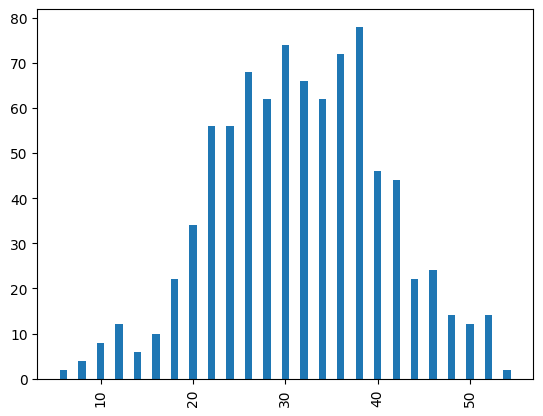

minimum hams: {'12', '10', '06', '16', '22', '18', '20', '24', '08'}
total minimums: 9
30


In [29]:
# Move everyting into hamming folders

# Update cdict with latest file locations
seen = set()
seensizes = set()
tags = set()
cdict = {}
ham_goes = {}

# First we classify by size
sort_choice = "by_size"
cdict = build_cdict(thumbs)
hamdiffs = Counter()
catpairs = set()
for cat1 in cdict:
    parts1 = cat1.split("_")
    washcat1 = parts1[1]
    for cat2 in cdict:
        parts2 = cat2.split("_")
        washcat2 = parts2[1]
        int1, int2 = [int(x, 16) for x in (washcat1, washcat2)]
        if int1 != int2:
            diff = bin(int1 ^ int2).count("1")
            append_list = [int(diff)]
            catpairdiff = tuple(sorted([washcat1, washcat2]) + append_list)
            hamdiffs[diff] += 1
            catpairs.add(catpairdiff)
sorted_dict = dict(sorted(hamdiffs.items(), key=lambda item: item[0], reverse=False))
plt.bar(hamdiffs.keys(), hamdiffs.values())
plt.xticks(rotation=90)
plt.show()

df = pd.DataFrame(catpairs, columns=["cat1", "cat2", "ham"])
min_hams = set()
for cat in df.groupby("cat1"):
    name, dfg = cat
    min_ham = dfg.ham.min()
    min_ham = str(min_ham).zfill(2)
    min_hams.add(min_ham)
    ham_goes[name] = min_ham
for whash in {x.split("_")[1] for x in cdict} - ham_goes.keys():
    ham_goes[whash] = "00"
print("minimum hams:", min_hams)
print("total minimums:", len(min_hams))
print(len(ham_goes))    

sort_choice = "by_ham"
cdict = build_cdict(f"{data}/thumbs")

In [34]:
# Sort cats into minimum hamming-distance folders
def sort_it(by=""):
    for file in cdict:
        from_folder = cdict[file]
        parts = file.split("_")
        size, whash = parts[:2]
        by_dict = {
            "by_ham": ham_goes[whash],
            "by_size": size,
            "": "",
        }
        if sort_choice == "by_folder":
            to_folder = Path(file)
        else:
            the_folder = by_dict[by]
            try:
                to_folder = Path(f"{data}/thumbs/{by}/{the_folder}")
            except:
                continue
        if not to_folder.is_dir():
            Path(to_folder).mkdir(parents=True, exist_ok=True)
        full_path = f"{from_folder}/{file}"
        dest_file = Path(f"{to_folder}/{file}")
        if not dest_file.is_file():
            dest = shutil.move(full_path, to_folder)

In [35]:
# Sort thumbnails by size.
sort_choice = "by_size"
cdict = build_cdict(thumbs)
sort_it(sort_choice)

In [58]:
# Sort thumbnails by minimum hamming distances.
sort_choice = "by_ham"
cdict = build_cdict(thumbs)
sort_it(sort_choice)

In [100]:
# Move all thumbnails back to top-level.
sort_choice = ""
cdict = build_cdict(thumbs)
sort_it()

Done


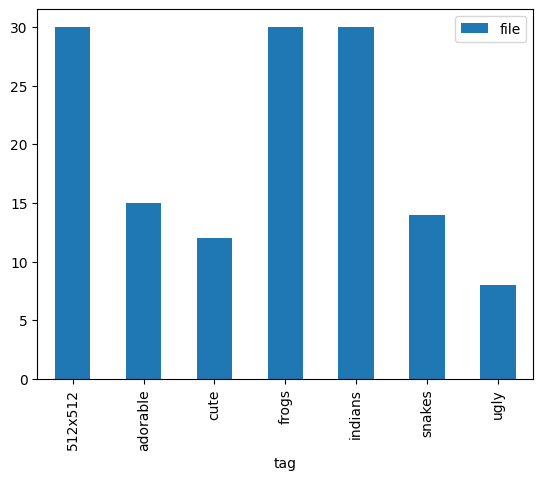

In [136]:
# We can drag things into folders to tag them.

sort_choice = "by_folder"
cdict = build_cdict(thumbs)
sort_it(sort_choice)
if not tagtable.exists():
    with open(tagtable, "wb") as fh:
        fh.write(dumps(tags))
else:
    with open(tagtable, "rb") as fh:
        existig_tags = loads(fh.read())
        [existig_tags.add(x) for x in tags]
    with open(tagtable, "wb") as fh:
        fh.write(dumps(existig_tags))
print("Done")

# We can use DataFrames to do our MatplotLibs.
df = pd.DataFrame(existig_tags, columns=["file", "tag"])
df.groupby("tag").count().plot(kind="bar").plot();

In [64]:
# Yes, the meta data is stplotin the PNG thumnails.
for i, cat in enumerate(cdict):
    file = f"{cdict[cat]}/{cat}"
    print(file)
    img = Image.open(file)
    meta = img.text
    for key in meta:
        print(f"{key}: {meta[key]}")
    print()
    if i >= 2:
        break  # Seen enough proof?
print("Done")

cats/thumbs/512x512_00007e7c7c7c7e7c_.png
filename: cat-018.jpg
width: 512
height: 512
format: JPEG
format_description: JPEG (ISO 10918)
bands: ('R', 'G', 'B')
extremes: ((4, 255), (0, 255), (0, 253))
xmp: {}

cats/thumbs/snakes/512x512_000080881fffffff_.png
filename: cat-002.jpg
width: 512
height: 512
format: JPEG
format_description: JPEG (ISO 10918)
bands: ('R', 'G', 'B')
extremes: ((0, 255), (0, 255), (0, 255))
xmp: {}

cats/thumbs/512x512_00223c7e7cfce8f8_.png
filename: cat-014.jpg
width: 512
height: 512
format: JPEG
format_description: JPEG (ISO 10918)
bands: ('R', 'G', 'B')
extremes: ((0, 255), (0, 255), (0, 253))
xmp: {}

Done
